In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./../../../designer/script/')
from design import Design
from film import FilmSimple
from spectrum import Spectrum
from optimizer.needle_insert import make_test_insert_film, get_insert_grad



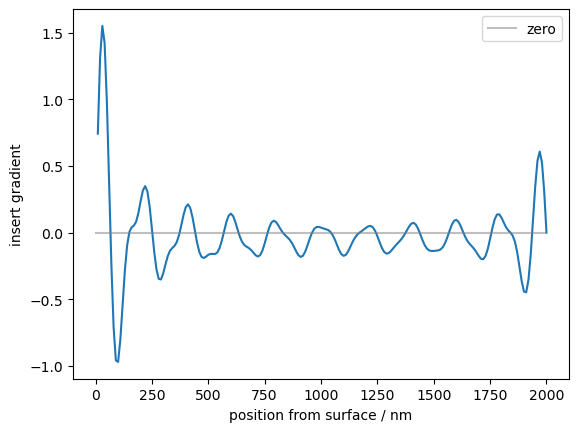

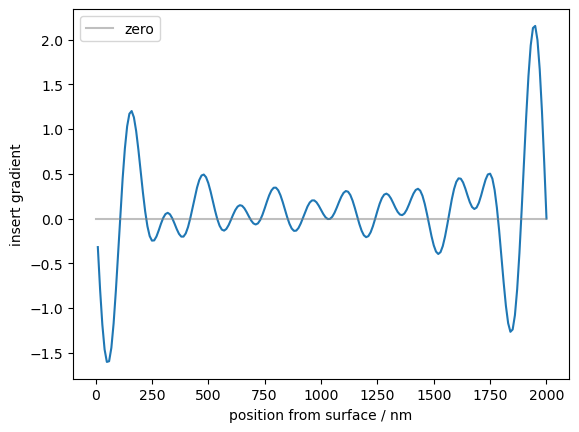

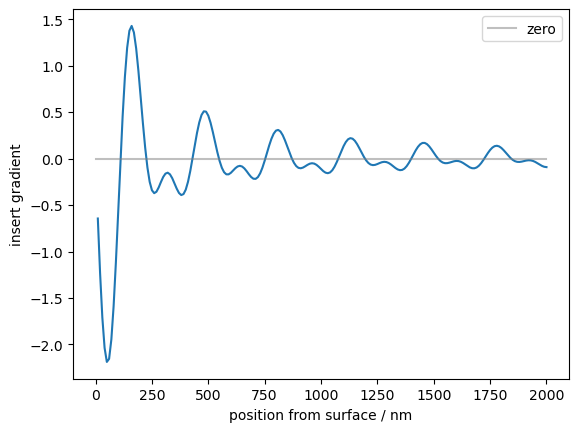

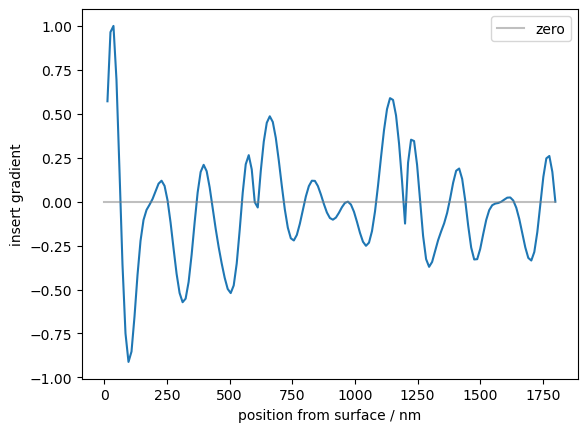

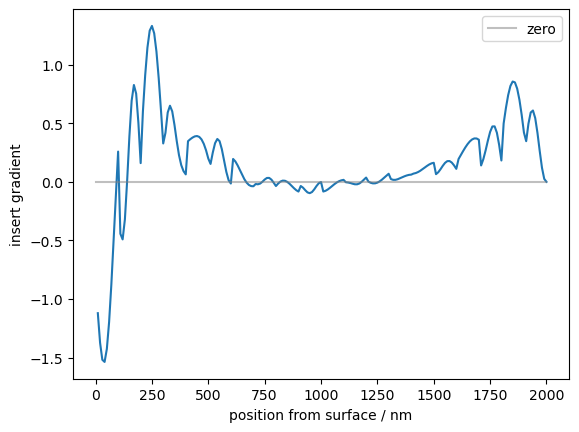

In [26]:
def plot_insert_gradient(film, target_reflect_spec, search_pts=200):

    insert_idx = make_test_insert_film(film, search_pts)
    grad = get_insert_grad(film, [target_reflect_spec])

    fig, ax = plt.subplots(1, 1)
    ax.plot([film.get_d()[:i].sum() for i in insert_idx], grad[insert_idx])
    ax.plot([0, film.get_d.sum()], [0, 0], c='grey', alpha=0.5, label='zero')
    ax.set_xlabel('position from surface / nm')
    ax.set_ylabel('insert gradient')
    ax.legend()

wls = np.linspace(500, 1000, 500)
target_reflect_spec = Spectrum(0., wls, np.ones(wls.shape[0], dtype='float'))

d = np.array([2000])
film = FilmSimple('TiO2', 'SiO2', 'SiO2', d)
plot_insert_gradient(film, target_reflect_spec)

d = np.array([2000])
film = FilmSimple('SiO2', 'TiO2', 'TiO2', d)
plot_insert_gradient(film, target_reflect_spec)

d = np.array([2000])
film = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
plot_insert_gradient(film, target_reflect_spec)

d = np.array([600, 600, 600])
film = FilmSimple('TiO2', 'SiO2', 'SiO2', d)
plot_insert_gradient(film, target_reflect_spec, 50)

d = np.array([100] * 20)
film = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
plot_insert_gradient(film, target_reflect_spec, 10)



# conclusion: big insertion gradeint ON THE INTERFACE. in the middle, should be some